# Gradient Descent

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/05-2-gradient_descent.ipynb)

This notebook follows the content of the lesson on gradient descent. In it, you can run a gradient descent simulation and try out what happens with different learning rate settings. You can experiment with the values of other settings and get a better understanding of how this algorithm works.

First, load the libraries that will be needed for further work.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Intuition of Gradient Descent

In the next two cells, the function $f(x)=(x-1)^2$ and its derivative $f'(x)=2x-2$ are defined. Execute them to be able to use the functions further.

In [2]:
def f(x):
  return (x-1)**2

In [3]:
f(3)

4

In [4]:
def f_izvod(x):
  return 2*x-2

In [5]:
f(1)

0

The following section allows you to track what happens in individual steps of the gradient descent.

In this cell, you can set the initial value of the point `x0` and the learning rate `alfa`. Each time you change something, execute the cells below as well.

In [6]:
x0 = 3
alfa = 0.25

The array `points` will contain the values obtained by individual descent steps. We will be able to display them using the function `show_graph`.

In [7]:
points = [x0]

In [8]:
def show_graph(f, iteration=0, show_transition=False):
  x = np.linspace(-4, 6, 100, endpoint=True)
  y = f(x)

  plt.xticks(np.arange(-4, 6), np.arange(-4, 6))
  plt.plot(x, y)

  for t in points:
    plt.scatter(t, f(t), color='red')

  if show_transition == True:
    num_points = len(points)
    for i in range(0, num_points-1):
      plt.plot([points[i], points[i+1]], [f(points[i]), f(points[i+1])], linestyle='--', color='gray')

  plt.title('Iteration number: {iteration}: '.format(iteration=iteration))
  plt.show()


The function `one_step_descent` calculates the value for `x` to which we will move in one step of gradient descent. Execute the cell to be able to use it.

In [9]:
def one_step_descent(f, f_derivative, x, alpha):
  x_new = x - alpha * f_derivative(x)

  return x_new

By consecutively executing the cell below, you can track the descent towards the minimum of the function.

In [10]:
iteration = 1

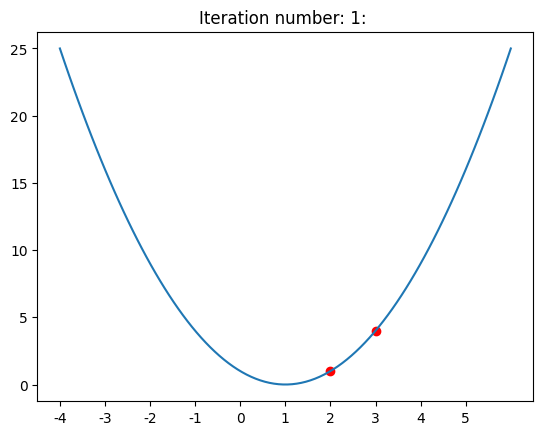

In [11]:
# calculate the new point
x = one_step_descent(f, f_izvod, x0, alfa)

# add the point to the list of points
points.append(x)

# display the graph
show_graph(f, iteration, show_transition=False)

# increment the iteration number
iteration = iteration + 1

# set the position for the next descent
x0 = x


You can now go back to the beginning and try the following values:
*   `x0=3` and `alfa=0.05` - this will be a test of patience due to the slow descent!
*   `x0=3` and `alfa=1.05` - this will be a surprise because there is actually no descent!
*   `x0=5` and `alfa=0.9` - this will show you what a zigzag trap means!

In these experiments, be sure to set the `show_transition` argument to `True` in the `show_graph` function so you can track the point's path.

## Gradient Descent Algorithm

This cell contains all the settings for the gradient descent function.

In [12]:
x0 = 3
alpha = 0.1
epsilon = 0.001
max_iterations = 100

This cell contains the implementation of the gradient descent function. When you execute it, you will be able to immediately see for which x the value of the function is the smallest. Be sure to examine how the result changes for different settings of this algorithm. For example, for some combinations of learning steps and starting points, the descent will be very slow.

In [13]:
def gradient_descent(f, f_derivative, x, alpha, epsilon, max_iterations):

    # set the initial value for x
    x_old = x

    # in each iteration ...
    for i in range(0, max_iterations):

        # calculate the current value for x
        x_new = x_old - alpha * f_derivative(x_old)

        # and then check if the stopping criterion is met
        if np.abs(f(x_new) - f(x_old)) < epsilon:
            break

        # if the criterion is not met, prepare x for the next iteration
        x_old = x_new

    # at the end of the whole process, prepare a report with information:
    # whether the algorithm stops,
    # how many iterations it lasted,
    # and what value of x was found
    report = {}
    report['stops'] = i != max_iterations
    report['num_iterations'] = i
    report['x_min'] = x_old

    return report


The function report tells us whether the algorithm has stopped (i.e., whether the desired calculation accuracy has been achieved), how many iterations it took, and the point at which the function value is the smallest. Execute the following cells to generate the report.

In [14]:
report = gradient_descent(f, f_izvod, x0, alfa, epsilon, max_iterations)

In [15]:
report

{'stops': True, 'num_iterations': 6, 'x_min': 1.03125}

## Search for parameters $\beta_0$ and $\beta_1$

As we have learned, for a given set of points $(x, y)$, the mean squared error is calculated as the sum of the squares of the differences between the expected values and the model predictions using the formula $\frac{1}{N}\sum_{i=1}^N (y_i - (\beta_0 + \beta_1x_i))^2$ or $\frac{1}{N} \sum_{i=1}^N (y_i -\beta_0 - \beta_1x_i)^2$. Our goal is to determine the values of the parameters $\beta_0$ and $\beta_1$ for which the value of this function is the smallest. It is clear that the function $\frac{1}{2N} \sum_{i=1}^N (y_i -\beta_0 - \beta_1x_i)^2$ will have the smallest value for these parameters, so its form is much more commonly used due to the finer shapes of the gradient. Therefore, we will use it in the continuation.

Following this formula, the function `mean_squared_error` for given arguments $\beta_0$, $\beta_1$, $x$, and $y$ calculates the value of the mean squared error. This is also the function for which we want to find the minimum using the gradient descent technique.

In [16]:
def mean_squared_error(beta0, beta1, x, y):
    return 0.5 * np.average((y - beta0 - beta1 * x) ** 2)

The error minimization should be performed with respect to the parameters $\beta_0$ and $\beta_1$. Therefore, we will also need the gradients of this function with respect to $\beta_0$ and $\beta_1$. It can be verified that this is the vector $[-\frac{1}{N} \sum_{i=1}^{N}(y_i - \beta_0-\beta_1x_i), -\frac{1}{N} \sum_{i=1}^{N}(y_i - \beta_0 -\beta_1x_i)\cdot x_i]$. If we pass through the sum with a minus for simpler calculation, we get the vector $[\frac{1}{N} \sum_{i=1}^{N}(\beta_0 + \beta_1x_i - y_i), \frac{1}{N} \sum_{i=1}^{N}(\beta_0 + \beta_1x_i - y_i)\cdot x_i]$.

Now we will get to work on adapting the gradient descent function for the linear regression task. We need to keep in mind that we have two variables `beta0` and `beta1` and that the function whose minimum we are looking for is the mean squared error.

In [17]:
def gradient_descent_linear_regression(x, y, mean_squared_error, beta0, beta1, alpha, epsilon, max_iterations, plot=False):

    # set the initial value for beta0 and beta1
    beta0_old = beta0
    beta1_old = beta1

    # calculate the initial value of the error function
    error_old = mean_squared_error(beta0_old, beta1_old, x, y)

    # to be able to track how the value of the error function changes
    # we will store all calculated values in the errors array
    errors = [error_old]

    # in each iteration ...
    for i in np.arange(0, max_iterations):

        # calculate the current value for beta0 and beta1 by:

        # first calculate the gradient directions
        beta0_correction = np.average(beta0_old + beta1_old * x - y)
        beta1_correction = np.average((beta0_old + beta1_old * x - y) * x)

        # and then update the values for beta0 and beta1
        beta0_new = beta0_old - alpha * beta0_correction
        beta1_new = beta1_old - alpha * beta1_correction

        # for these calculated values, calculate the value
        # of the mean squared error
        error_new = mean_squared_error(beta0_new, beta1_new, x, y)

        # and then check if the stopping criterion is met
        if np.abs(error_new - error_old) < epsilon:
            break

        # alternatively, the stopping criterion can be that
        # the value of the gradient is less than some predefined value
        # if np.linalg.norm(np.array([beta0_correction, beta1_correction])) < epsilon:
        #   break

        # if the criterion is not met, prepare beta0 and beta1 for the next iteration
        beta0_old = beta0_new
        beta1_old = beta1_new

        # prepare the value of the error function
        error_old = error_new

        # and add it to the array with all errors
        errors.append(error_new)

    # at the end of the whole process, prepare a report with information:
    # whether the algorithm stops,
    # how many iterations it lasted,
    # and what value of beta0 and beta1 was found

    report = {}

    report['stops'] = i != max_iterations - 1
    report['num_iterations'] = i
    report['b_min'] = (beta0_old, beta1_old)

    # if the plot argument is set
    # we will also plot the error function during the parameter search
    if plot == True:
        plt.title('Error Function')
        plt.xlabel('Number of iterations')
        plt.ylabel('Mean Squared Error')
        plt.plot(np.arange(0, len(errors)), np.log(errors))

    return report


We will now set the values for `x` and `y` to correspond to the values of property areas and their prices from the previous example.

In [18]:
x = np.array([43, 25, 66, 80, 105, 70, 40, 85, 84, 102])
y = np.array([60, 32.1, 88.4, 111.4, 120.32, 72.1, 46.3, 90.1, 99.6, 139.2])

We will also select some initial values for the parameters that figure in the algorithm. Now this task is much harder because we do not have a clear idea of where to position ourselves or which parameter values to choose.

In [19]:
beta0 = 2.5
beta1 = 1.5
alpha = 0.00001
epsilon = 0.000001
max_iterations = 200

Then we will start the search by calling the function we prepared.

In [20]:
gradient_descent_linear_regression(x, y, mean_squared_error, beta0, beta1, alpha, epsilon, max_iterations, plot=False)

{'stops': np.True_,
 'num_iterations': np.int64(151),
 'b_min': (np.float64(2.4960466912761294), np.float64(1.1930132064518595))}

Be sure to try what happens when you change some values. Again, you can expect a slow descent, a zigzag trap, or a process that does not lead you to a solution.

In practice, variants of gradient descent with a variable learning rate are more commonly used. These variants follow the logic that when we are confident we are moving in the right direction, we can take larger steps, while when we are less confident, we can take smaller steps and be more cautious. It is also common practice to use data standardization techniques in these algorithms to make the entire process numerically more stable.

One such better solution that these algorithms would find for us is $\beta_0$=2.056 and $\beta_1$=1.198.